In [3]:
from math import factorial
import numpy as np
from itertools import combinations_with_replacement
import time
from grad_descent import grad_descent
from function_generation.PolynomialGenerator import PolynomialGenerator
from experiments.utils.generate_quadratics import generate_quadratic
from experiments.utils.get_lipschitz import get_lipschitz
from line_searches.Constant import Constant
from line_searches.QuasiWolfe import QuasiWolfe

In [4]:
# run with exact lipschitz for d up to 20

max_steps = 2000
epsilons = 10 ** np.linspace(-1, -5, 20)
repeats = 10
dimension = 3
degree = 7
qw = QuasiWolfe()


bounds = [-1, 1]


# Main loop

start_time = time.time()
results = np.zeros((repeats, len(epsilons)))
distances = np.zeros((repeats, max_steps+1 ))
gradients = np.zeros((repeats, max_steps+1))

for j in range(repeats):

    initial_x = np.random.uniform(-1, 1, dimension)
    cum_step_count1 = 0
    cum_steps1 = np.zeros(( max_steps+1, dimension))
    cum_gradients1 = np.zeros(max_steps+1)
    start1 = initial_x
    index1 = 0

    # f_1, g_1, h_1 = generate_quadratic(dimension, linear=True, mixed=True, )
    f_1, g_1, h_1 = PolynomialGenerator().generate(dimension,degree)
    # l1 = np.max(np.abs(np.linalg.eigvals(h_1())))


    for k, epsilon in enumerate(epsilons):

        # data collection 1
        steps1, step_count_1, _, _, end1, gradients1 = grad_descent(f_1, g_1, start1, learning_rate = Constant(0.01), epsilon=epsilon, max_steps=max_steps, termination_criteria="y",verbose=False, constraints=bounds ,record_trace=True, record_gradients=True)

        # print(len(steps1))
        # print(len(gradients1))

        # print(f" gradients {gradients1}")
        if step_count_1 < max_steps:
            cum_step_count1 += step_count_1
        results[j, k] =  cum_step_count1

        available_spaces1 = max_steps+1-index1
        available_from_input = np.clip(available_spaces1,0,steps1.shape[0])
        if index1 == 0:
            cum_steps1[index1:index1+available_from_input] = steps1[:available_from_input]
            cum_gradients1[index1:index1+available_from_input] = gradients1[:available_from_input]
            index1 = available_from_input
        else:
            available_from_input = np.clip(available_spaces1,0,steps1.shape[0]-1)
            cum_steps1[index1:index1+available_from_input] = steps1[:available_from_input]
            cum_gradients1[index1:index1+available_from_input] = gradients1[:available_from_input]
            index1 += available_from_input

        start1 = end1

    print(f"Finished repeat {j}")




    distances[j, 0:index1-1] = np.linalg.norm(cum_steps1[:index1-1] - cum_steps1[index1-1][None,:], axis=1)
    gradients[j, 0:index1] = cum_gradients1[:index1]


Finished repeat 0
Finished repeat 1
Finished repeat 2
Finished repeat 3
Finished repeat 4
Finished repeat 5
Finished repeat 6
Finished repeat 7
Finished repeat 8
Finished repeat 9


61
[-1.58911392e+00  0.00000000e+00 -4.88069107e-02 -3.28687057e-02
 -1.84318969e-02 -7.40069593e-03 -4.73999067e-04  2.60398528e-03
  2.54822497e-03  1.46891366e-04 -3.92512043e-03 -9.15168160e-03
 -1.51563122e-02 -2.16659161e-02 -2.84777722e-02 -3.54353461e-02
 -4.24124797e-02 -4.93038696e-02 -5.60197635e-02 -6.24832852e-02
 -6.86292774e-02 -7.44039235e-02 -7.97646711e-02 -8.46801611e-02
 -8.91299911e-02 -9.31042332e-02 -9.66026914e-02 -9.96339283e-02
 -1.02214117e-01 -1.04365783e-01 -1.06116506e-01 -1.07497636e-01
 -1.08543070e-01 -1.09288132e-01 -1.09768560e-01 -1.10019638e-01
 -1.10075458e-01 -1.09968326e-01 -1.09728302e-01 -1.09382877e-01
 -1.08956761e-01 -1.08471795e-01 -1.07946945e-01 -1.07398386e-01
 -1.06839649e-01 -1.06281814e-01 -1.05733733e-01 -1.05202277e-01
 -1.04692588e-01 -1.04208322e-01 -1.03751883e-01 -1.03324647e-01
 -1.02927151e-01 -1.02559271e-01 -1.02220376e-01 -1.01909454e-01
 -1.01625221e-01 -1.01366211e-01 -1.01130848e-01]
125
[-5.01112632e-02 -2.04846752e-02 

C:\Users\Owner\AppData\Local\Temp\ipykernel_22952\3153561669.py:31: RuntimeWarning: divide by zero encountered in divide
  order = numerator/denominator
C:\Users\Owner\Desktop\MastersProject\venv\Lib\site-packages\scipy\stats\_stats_py.py:204: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


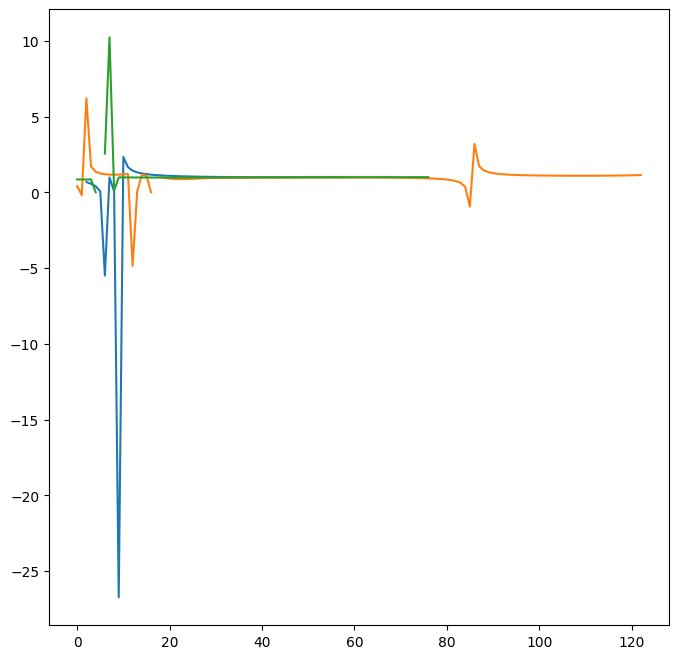

In [6]:
import matplotlib.pyplot as plt
from experiments.utils.miscellaneous import smooth_running_mean

plt.style.use("default")
fig, ax = plt.subplots(figsize=(8,8))

# 1, 45, 38

# len(gradients)

for i in range(3):
    # extracted_distances = distances[i][distances[i] != 0]
    # # if len(extracted_distances) == 0 or :
    # #     continue
    # ax.plot(np.arange(len(extracted_distances)), extracted_distances)
    # print(results[i])

    extracted_gradients = gradients[i][gradients[i] != 0]
    print(len(extracted_gradients))
    # plot gradients
    if len(extracted_gradients)>4:

        # ax.plot(np.arange(len(extracted_gradients)), extracted_gradients)
        # print(extracted_gradients)
        ratios = extracted_gradients[1:]/extracted_gradients[:-1]

        numerator = np.log(extracted_gradients[2:]/extracted_gradients[1:-1])
        denominator = np.log(extracted_gradients[1:-1]/extracted_gradients[:-2])
        print(denominator)

        order = numerator/denominator

        # print(f" order shape {order.shape}")
        smoothed_order = smooth_running_mean(order, 4, geometric=True)
        max_possible_order = np.minimum.accumulate(smoothed_order[::-1])[::-1]
        ax.plot(np.arange(len(order)), order )




# ax.set_xscale('log')
# # ax.set_yscale('log')
# ax.set_title(f"Counts of steps required to reach an $\epsilon$-KKT point")
# ax.set_xlabel("1/$\epsilon$")
# ax.set_ylabel("Number of steps")
# ax.set_xlim(0,10)

C:\Users\Owner\AppData\Local\Temp\ipykernel_20960\447831565.py:21: RuntimeWarning: divide by zero encountered in divide
  order = numerator/denominator
C:\Users\Owner\Desktop\MastersProject\venv\Lib\site-packages\scipy\stats\_stats_py.py:204: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


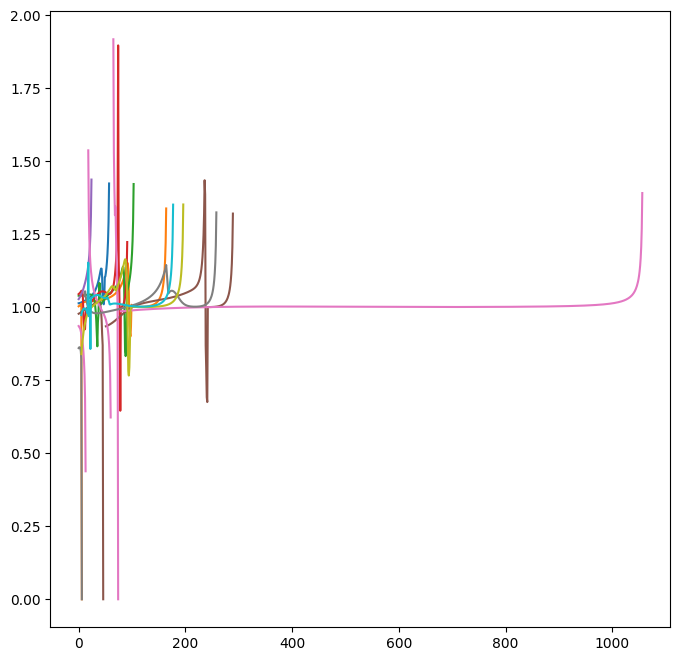

In [41]:
# and some distances

number_to_plot = 10

fig, ax = plt.subplots(figsize=(8,8))

condition = 0

for i in range(number_to_plot):

    s = distances[i]
    diffs = s[s>0]
    # print(steps_extracted2)

    if len(diffs)>3:

        numerator = np.log(diffs[2:]/diffs[1:-1])
        denominator = np.log(diffs[1:-1]/diffs[:-2])
        # # print(diffs)
        ratios = diffs[1:]/diffs[:-1]
        order = numerator/denominator

        # print(f" order shape {order.shape}")
        smoothed_order = smooth_running_mean(order, 4, geometric=True)
        max_possible_order = np.minimum.accumulate(smoothed_order[::-1])[::-1]
        ax.plot(np.arange(len(smoothed_order)), smoothed_order )


[22. 26. 30. 34. 37. 41. 45. 49. 53. 57. 61. 64. 68. 72. 76. 80. 84. 88.
 91. 95.]
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10.]
[46. 46. 46. 46. 46. 46. 46. 46. 46. 46. 46. 46. 46. 46. 46. 46. 46. 46.
 46. 46.]
[ 43.  53.  62.  71.  81.  90.  99. 105. 111. 118. 124. 130. 136. 142.
 149. 155. 161. 167. 174. 180.]
[19. 22. 25. 28. 31. 35. 38. 41. 44. 47. 50. 53. 57. 60. 63. 66. 69. 72.
 75. 79.]
[15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15.]
[15. 19. 24. 28. 32. 36. 40. 45. 49. 53. 57. 62. 66. 70. 74. 79. 83. 87.
 91. 96.]
[ 24.  29.  37.  45.  54.  62.  71.  79.  88.  97. 105. 114. 123. 131.
 140. 148. 157. 166. 174. 183.]
[ 18.  23.  29.  35.  41.  47.  53.  58.  64.  70.  76.  82.  88.  93.
  99. 105. 111. 117. 123. 128.]
[18. 20. 23. 26. 29. 32. 34. 37. 40. 43. 46. 49. 51. 54. 57. 60. 63. 65.
 68. 71.]


Text(0, 0.5, 'Number of steps')

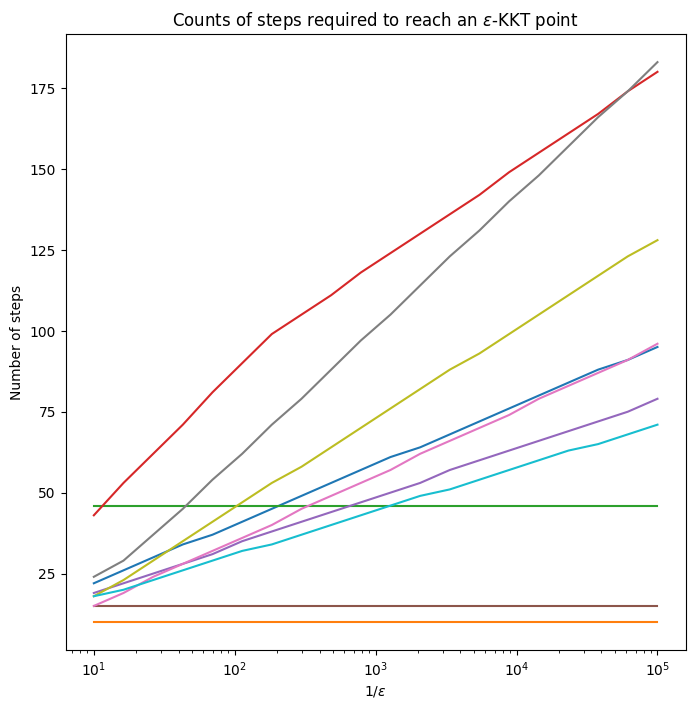

In [32]:
fig, ax = plt.subplots(figsize=(8,8))

# 1, 45, 38

for i in range(len(results)):
    # print(results[i])
    ax.plot(1/epsilons, results[i])

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_title(f"Counts of steps required to reach an $\epsilon$-KKT point")
ax.set_xlabel("1/$\epsilon$")
ax.set_ylabel("Number of steps")